# ANALYSIS


### importing OS and sys

In [16]:
import os, sys

nbook_dir = os.getcwd()

# Add the parent directory of the 'scripts' folder to sys.path
sys.path.append(os.path.abspath(os.path.join(nbook_dir, '..')))

### importing my functions to use modularization

In [17]:
from textblob import TextBlob

from scripts.data_loader import load_data
from scripts.data_loader import load_data_finance
from scripts.data_analysis import get_sentiment
from scripts.data_analysis import classify_sentiment
from scripts.data_analysis import calc_moving_avrg
from scripts.data_visualization import plot_data
from scripts.data_visualization import plot_univariate
from scripts.data_visualization import plot_bivariate




Loading the data

In [18]:

# Load the data
data_yfinance = load_data_finance("../yfinance_data/AAPL_historical_data.csv")
data = load_data("../raw_analyst_ratings.csv/raw_analyst_ratings.csv")

#print("Dataset Overview:")
#print(data.head())
#data.head()
print(data.columns)


Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock'], dtype='object')


In [19]:

# Add a 'sentiment' column with sentiment scores
data['sentiment'] = data['headline'].apply(get_sentiment)

data['sentiment_category'] = data['sentiment'].apply(classify_sentiment)

# Group by Stock Symbol to get average sentiment per stock
stock_sentiment = data.groupby('stock')['sentiment'].mean().reset_index()
stock_sentiment = stock_sentiment.rename(columns={'sentiment': 'average_sentiment'})

# Display Results
print("\nSentiment Analysis Results:")
print(data[['headline', 'stock', 'sentiment', 'sentiment_category']].head())

print("\nAverage Sentiment per Stock:")
print(stock_sentiment)



Sentiment Analysis Results:
                                            headline stock  sentiment  \
0            Stocks That Hit 52-Week Highs On Friday     A        0.0   
1         Stocks That Hit 52-Week Highs On Wednesday     A        0.0   
2                      71 Biggest Movers From Friday     A        0.0   
3       46 Stocks Moving In Friday's Mid-Day Session     A        0.0   
4  B of A Securities Maintains Neutral on Agilent...     A        0.0   

  sentiment_category  
0            Neutral  
1            Neutral  
2            Neutral  
3            Neutral  
4            Neutral  

Average Sentiment per Stock:
     stock  average_sentiment
0        A           0.045094
1       AA           0.041412
2      AAC           0.026827
3     AADR           0.000000
4      AAL           0.021614
...    ...                ...
6199   ZTR          -0.025792
6200   ZTS           0.053227
6201    ZU           0.073804
6202  ZUMZ           0.029185
6203    ZX           0.030246

[62

In [20]:
from textblob import TextBlob

text_1 = "The movie was so awesome."
text_2 = "The food here tastes terrible."

#Determining the Polarity 
p_1 = TextBlob(text_1).sentiment.polarity
p_2 = TextBlob(text_2).sentiment.polarity

#Determining the Subjectivity
s_1 = TextBlob(text_1).sentiment.subjectivity
s_2 = TextBlob(text_2).sentiment.subjectivity

print("Polarity of Text 1 is", p_1)
print("Polarity of Text 2 is", p_2)
print("Subjectivity of Text 1 is", s_1)
print("Subjectivity of Text 2 is", s_2)

Polarity of Text 1 is 1.0
Polarity of Text 2 is -1.0
Subjectivity of Text 1 is 1.0
Subjectivity of Text 2 is 1.0


In [21]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()
text_1 = "The book was a perfect balance between wrtiting style and plot."
text_2 =  "The pizza tastes terrible."
sent_1 = sentiment.polarity_scores(text_1)
sent_2 = sentiment.polarity_scores(text_2)
print("Sentiment of text 1:", sent_1)
print("Sentiment of text 2:", sent_2)

Sentiment of text 1: {'neg': 0.0, 'neu': 0.73, 'pos': 0.27, 'compound': 0.5719}
Sentiment of text 2: {'neg': 0.508, 'neu': 0.492, 'pos': 0.0, 'compound': -0.4767}


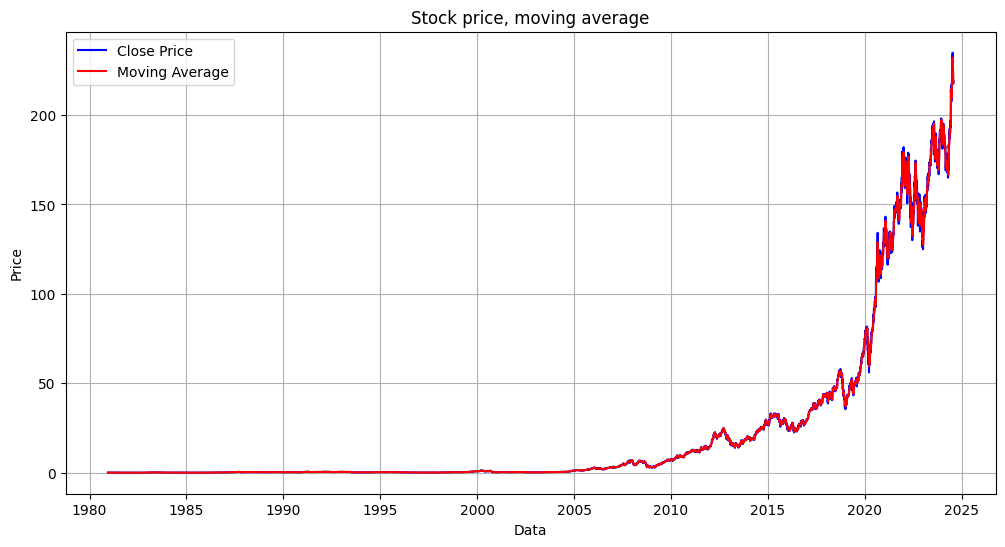

In [22]:
# Add a moving average column
data_yfinance["Moving Average"] = calc_moving_avrg(data_yfinance["Close"], window=5)

plot_data(data_yfinance)

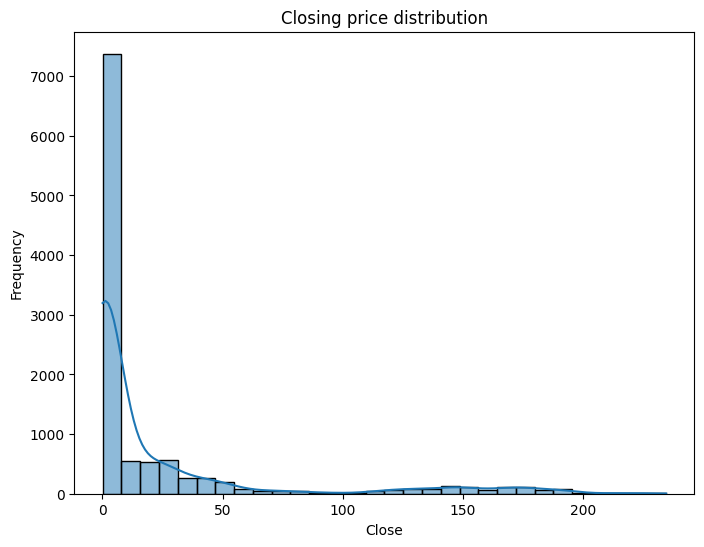

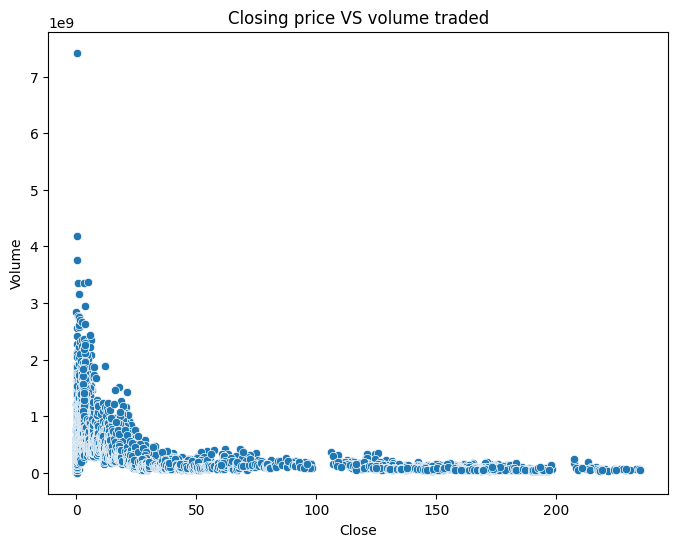

In [23]:
### univariate analysis takes the data_yfinance and the column "close" and plots the distribution
plot_univariate(data_yfinance, 'Close', title="Closing price distribution")

### bivariate analysis takes the data_yfinance and the columns "close" and "volume"
plot_bivariate(data_yfinance, 'Close', 'Volume', title="Closing price VS volume traded")